# Graded Challenge Phase 0 - Week 2

**Name** : Dafa Wiratama
**Batch** : Data Science Batch 09

# Description
In this assignment, we will be working with image and some math to approximate edge of an Image.
We will be using the following image:
<img height="438" width="780" src="https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg"/>
source : [CNN](https://edition.cnn.com/2020/10/30/world/dog-dna-intl-scli-gbr-scn/index.html)
## Objective
- Use `NumPy` to perform `Math` operations
- Use `PIL` to load image
- Use `Matplotlib` to Visualize image
- Detect `Edges` of an image using `Mathematical Principles`

## Problem Statement
- How to detect edges of an image using mathematical principles?
- What is the best way to detect edges of an image?
- What is the most efficient way to detect edges of an image?

# Working Statement
## Libraries Import
in this assignment, we will be using the following libraries:
- `NumPy`
- `Pillow`
- `Matplotlib`
- `time`
- `tensoflow`

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time
import tensorflow as tf

# Image Loading
with the help of `Pillow` library, we can load an image with `Image.open(path)`
then we can cast it to `np.array` with `np.array(image)` with `dtype=np.float32` for better numerical precision instead of unsigned integer

In [2]:
img_original = Image.open('image_1.jpg')
img_original = np.array(img_original, dtype=np.float32)

### Image Analysis
- image has shape `(height, width, channel)`
- image has height: `438 px` and width: `780 px`
- image has 3 channels (RGB)


In [3]:
print(f"Image Shape : {img_original.shape}")
print(f"Image Height : {img_original.shape[0]} px")
print(f"Image Width : {img_original.shape[1]} px")
print(f"Image Channel : {img_original.shape[2]}")

Image Shape : (438, 780, 3)
Image Height : 438 px
Image Width : 780 px
Image Channel : 3


## Utility Functions
we will be using this function to show series of images to prevent the notebook from being too crowded

In [4]:
def plot_image(imgs, h_span=3):
    n = len(imgs)
    h_span = min(h_span, n)
    v_span = int(np.ceil(n / h_span))

    fig, ax = plt.subplots(v_span, h_span, figsize=(h_span * 8, v_span * 4))
    for v in range(v_span):
        for h in range(h_span):
            index = v * h_span + h

            if index < n:
                label, img = imgs[index]
                if v_span == 1:
                    ax[h].set_title(label)
                    ax[h].imshow(img, cmap='gray')
                    ax[h].axis('off')
                else:
                    ax[v, h].set_title(label)
                    ax[v, h].imshow(img, cmap='gray')
                    ax[v, h].axis('off')

## Image Preprocessing
before we can detect edges of an image, we need to preprocess it. in this case, we will be using the following steps:
- Normalization
- Dimensional Reduction

### Image Normalization
We will Normalize the image by dividing it by 255. so that the maximum value of the image is 1 (white). and the minimum value is 0 (black).

In [5]:
image_2 = img_original / 255.

### Image Dimensional Reduction
After normalization, we will Explore the following Solution:
- Channel wise
- Channel Aggregation - Mean
- Channel Aggregation - Luminosity

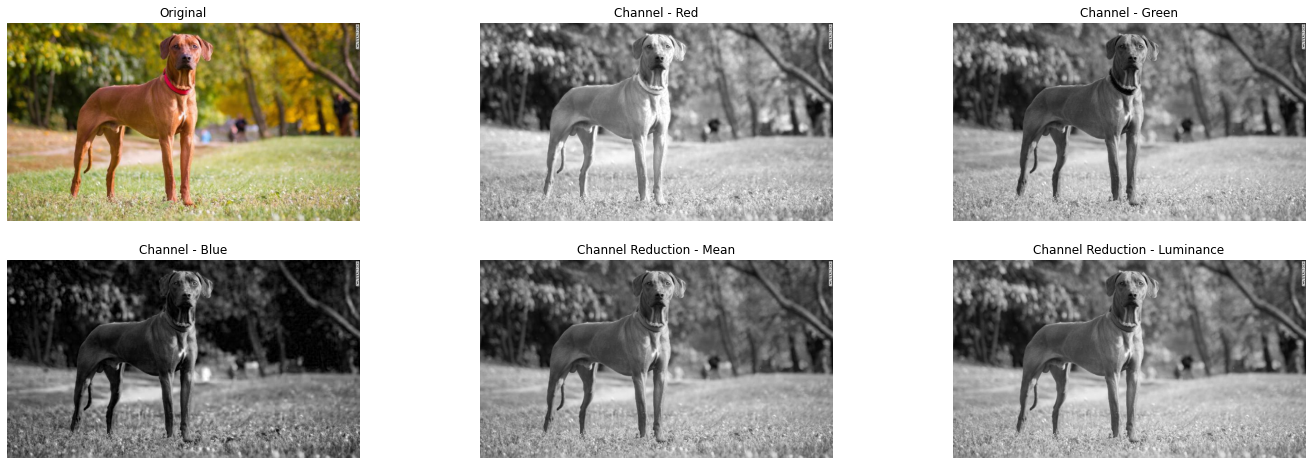

In [6]:
img_red, img_green, img_blue = image_2[:, :, 0], image_2[:, :, 1], image_2[:, :, 2]
img_mean = (img_red + img_green + img_blue) / 3.
img_luminance = (img_red * 0.3) + (img_green * 0.59) + (img_blue * 0.11)

plot_image([
    ('Original', image_2),
    ('Channel - Red', img_red),
    ('Channel - Green', img_green),
    ('Channel - Blue', img_blue),
    ('Channel Reduction - Mean', img_mean),
    ('Channel Reduction - Luminance', img_luminance)
])

#### Summary
after visualizing the image, we can see the following:
- Channel wise :
    Every channel has different brightness (`sensitifity`) to specific color.
    some channel has more contrast than others on specific region.
- Channel Aggregation :
    We can aggregate the channel to a single value by using the following methods:
    - Mean
    - Luminosity

from the visualization, we can see that mean/luminosity is the best method to aggregate the channel. and it is the most efficient method. because we decrease the number of channel. with little information loss.

# Edge Detection
after preprocessing, we can detect edges of an image using mathematical principles.
there are sef of methods to detect edges of an image.
- [Sobel](https://en.wikipedia.org/wiki/Sobel_operator)
- [Prewitt](https://en.wikipedia.org/wiki/Prewitt_operator)
- [Roberts](https://en.wikipedia.org/wiki/Roberts_cross)
- [Canny](https://en.wikipedia.org/wiki/Canny_edge_detector)
- [Other](https://en.wikipedia.org/wiki/Edge_detection)


## Assignment

### 1. Calculate Gradient Vector (Partial Derivative) for each axis
Hitung vektor gradien (turunan parsial) masing-masing pixel untuk masing-masing sumbu x dan y dengan rumus `aI/aX` dan `aI/aY`

we can detect edges using the gradient vector. by calculating first partial derivative of the image.
doing 2 pass x and y we can have horizontal and vertical edges with positive and negative magnitude.

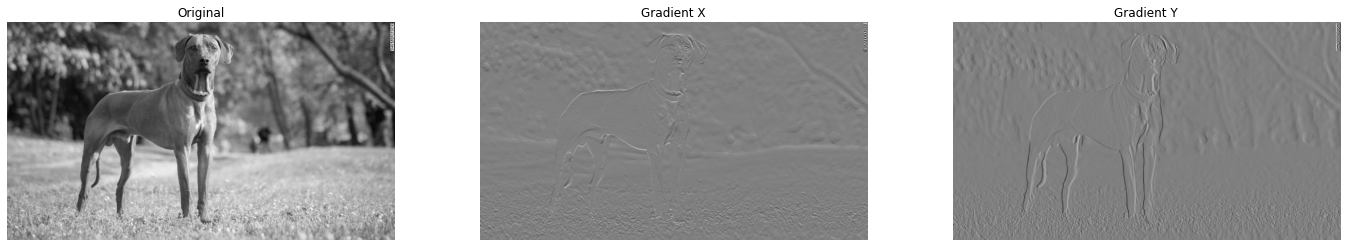

In [7]:
img_dx, img_dy = np.gradient(img_luminance)

plot_image([
    ('Original', img_luminance),
    ('Gradient X', img_dx),
    ('Gradient Y', img_dy)
])

### 2. Calculate Gradient Magnitude
Hitung gradient magnitude tiap pixel dengan rumus ########

after calculating gradient vector, we can calculate gradient magnitude.
- magnitude = sqrt(dx^2^ + dy^2^)

as we can see from the result the edges from 2 axis are combine and the array value are now normalized to 0-1.

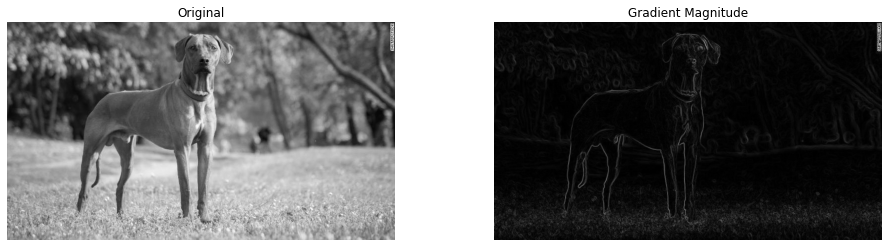

In [8]:
img_magnitude = np.sqrt(img_dx ** 2 + img_dy ** 2)

plot_image([
    ('Original', img_luminance),
    ('Gradient Magnitude', img_magnitude)
])

### 3-6. Edge Threshold / Limiter
- Tentukan sebuah threshold, misalkan 30.
- Jika nilai magnitude melebihi angka threshold, maka edge terdeteksi.
- Buat minimal dua buah threshold lain sehingga jumlah minimal threshold adalah 3. Lakukan poin 4. Visualisasikan hasil edge dari masing-masing threshold.
- Tentukan nilai threshold terbaik berdasarkan percobaan poin


we will be using lambda function to calculate pixel activation so when the pixel is above certain threshold, it will be activated (True).
if not it will be deactivated (False). from the result, when the threshold is too low the image is full off noise and when to high, only the strong edges will persist. and in this case we will be using threshold of .1 because it works the best. with our image

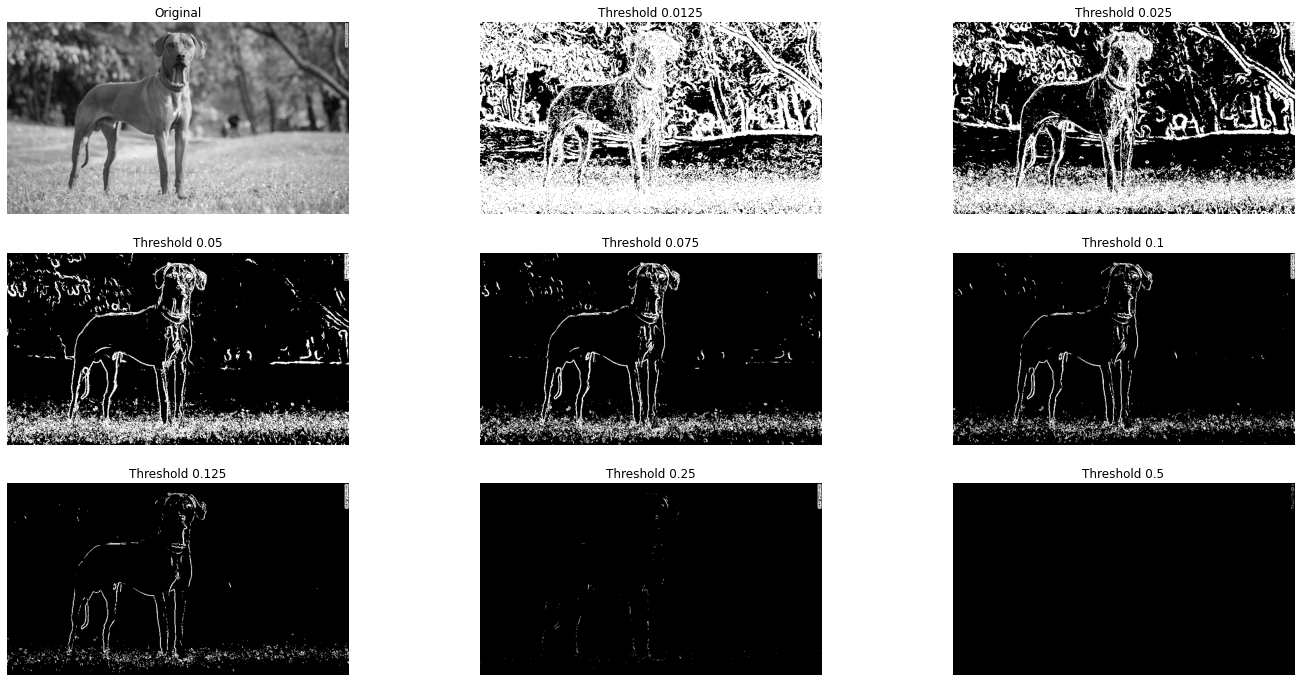

In [9]:
threshold = lambda img, th: img > th

thresholds = [.0125, .025, .05, .075, .1, .125, .25, .5]

plot_image([
    ('Original', img_luminance),
    *[(f'Threshold {x}', threshold(img_magnitude, x)) for x in thresholds]
])

# 7-8. Matrix Multiplication
- Buat sebuah matriks dengan nilai apapun yang bersesuaian dengan ukuran gambar dan sesuai dengan aturan perkalian matriks.
- Matriks ini kemudian akan dilakukan perkalian dengan matriks edge dengan threshold terbaik. Visualisasikan dan narasikan hasil dari perkalian kedua matriks ini.

after visualizing the image, we can see that the image kinda looks like a noise. lets try investigating the image further.


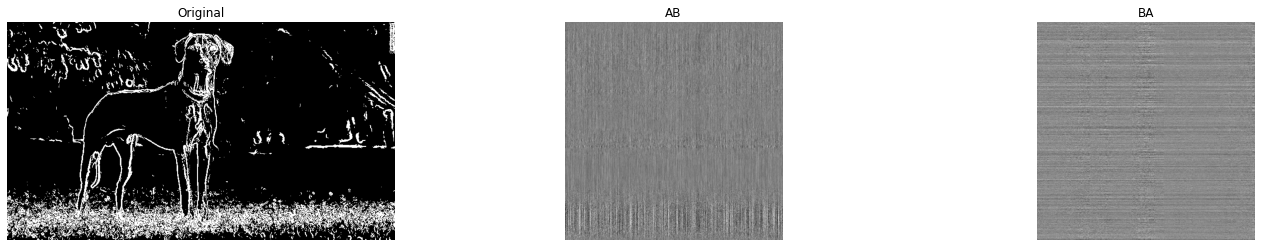

In [10]:
image = threshold(img_magnitude, .05)
random_matrix = np.random.normal(size=image.shape).T

plot_image([
    ('Original', image),
    ('AB', image @ random_matrix),
    ('BA', random_matrix @ image)
])

## Another Example
to better understand matrix multiplication, we can use the following example to illustrate the concept.
using the checkerboard image, perform the matrix multiplication with AB and BA order.

- A is the image
- B is the random matrix

### Summary
AB :
the result maintains the same vertical gap but squeeze on to horizontal.
BA :
the result maintains the same horizontal gap but squeeze on to vertical.

the output size ins the smaller of the two input size.

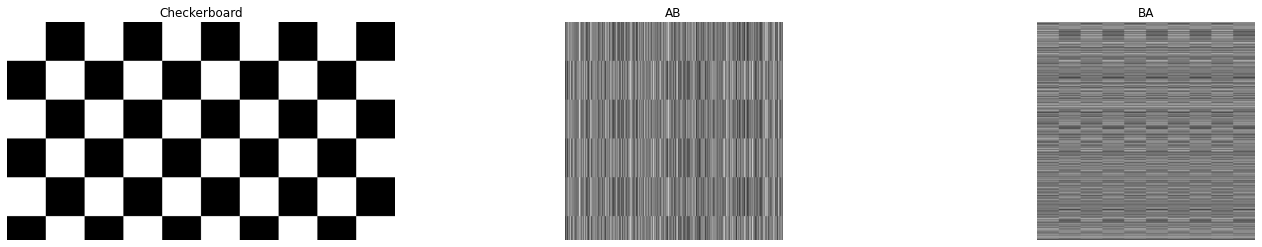

In [11]:
checkerboard = np.zeros_like(image, dtype=np.float32)
height, width = image.shape
for x in range(0, 10):
    for y in range(0, 10):
        if (x % 2 == 0) == (y % 2 == 0):
            span = width // 10
            checkerboard[(x * span):(x * span) + span, (y * span):(y * span) + span] = 1

plot_image([
    ('Checkerboard', checkerboard),
    ('AB', checkerboard @ random_matrix),
    ('BA', random_matrix @ checkerboard)
])

# Exploration
after finishing assignment we can explore same problem with following approach.

## Sobel Approach
Sobel estimate edge strength using the first derivative of a function. by calculating the gradient magnitude of the image. also we can use the gradient direction to estimate the edge strength.

sobel formula:
magnitude = `square root of (dx^2 + dy^2)`
gradient direction = `arctan(dy/dx)`

### Overview
this method is the most efficient and fastest method to detect edges.




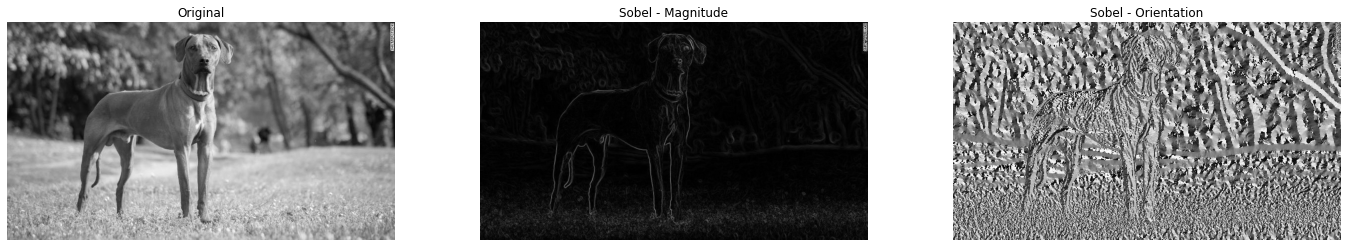

In [12]:
def sobel_algorithm(img):
    h, v = np.gradient(img)
    _magnitude = np.sqrt(h ** 2 + v ** 2)
    _orientation = np.arctan2(v, h)
    return _magnitude, _orientation


sobel_magnitude, sobel_orientation = sobel_algorithm(img_luminance)

plot_image([
    ('Original', img_luminance),
    ('Sobel - Magnitude', sobel_magnitude),
    ('Sobel - Orientation', sobel_orientation),
])

# Utility Functions
with this function we will easily apply convolution filter to an image. sliding pool window will be used to calculate the convolution.

In [13]:
def convolution(img, kernel):
    padded = np.pad(img, (1, 1), 'constant')
    result = np.zeros_like(img)

    size = kernel.shape[0]

    for i in range(padded.shape[0] - 2):
        for j in range(padded.shape[1] - 2):
            result[i, j] = np.sum(padded[i:i + size, j:j + size] * kernel)

    return result


# Roberts Edge Detection
this algorithm is used to detect edges in an image using 2 `2d convolution kernel`.
in this example we will use the following kernel:
x kernel:
```
[1, 0]
[-1, 0]
```
y kernel:
```
[0, 1]
[0, -1]
```

using this kernel we can produce a similar result to the sobel algorithm.


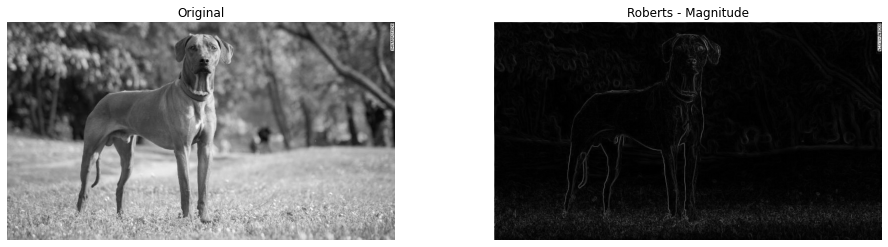

In [14]:
def robers_edge(img):
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])

    x = convolution(img, kernel_x)
    y = convolution(img, kernel_y)

    return np.sqrt(x ** 2 + y ** 2)


img_roberts_edge = robers_edge(img_luminance)

plot_image([
    ('Original', img_luminance),
    ('Roberts - Magnitude', img_roberts_edge),
])

# Prewitt Edge Detection
this algorithm almost the same as sobel algorithm by detecting horizontal and vertical edges.
but unlike sobel this operator does not emphasize the center pixel. so we will get stronger signal in the center of edge.

this technique uses the following kernel:
x kernel:
```
[-1, 0, 1]
[-1, 0, 1]
[-1, 0, 1]
```

y kernel:
```
[-1, -1, -1]
[0, 0, 0]
[1, 1, 1]
```

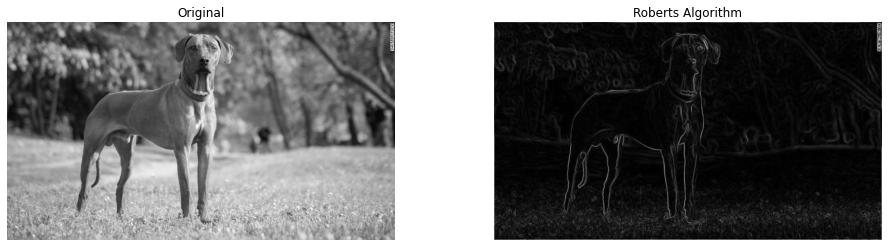

In [15]:
def prewitt_edge(img):
    horizontal = np.array([
        [1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1]
    ])
    vertical = np.array([
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ])
    edge_h = convolution(img, horizontal)
    edge_v = convolution(img, vertical)
    return np.sqrt(edge_h ** 2 + edge_v ** 2)


plot_image([
    ('Original', img_luminance),
    ('Roberts Algorithm', prewitt_edge(img_luminance)),
])

# Laplacian Edge Detection
Laplacian is somehow different algorithm that we use so far,
unlike sobel and prewitt this algorithm only use one `2 dimensional kernel`.
with this kernel we can approximate 2nd order derivative in single convolution pass.
because we only approximate 2nd order derivative this method is sensitive to noise.
usually we use gaussian filter to remove noise before applying this algorithm.

in this example we will use the following kernel:
```
[-1, -1, -1]
[-1, +8, -1]
[-1, -1, -1]
```

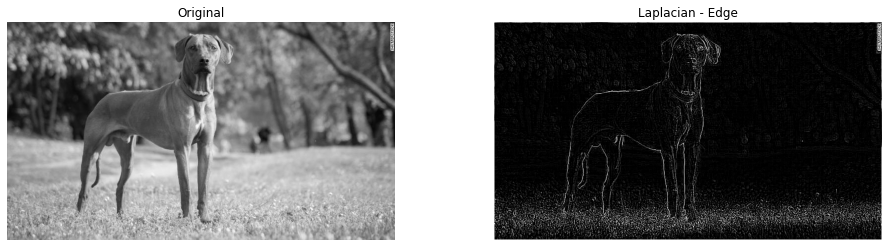

In [16]:
def laplacian_edge(img):
    kernel = np.array([
        [-1, -1, -1],
        [-1, +8, -1],
        [-1, -1, -1]
    ])
    img = convolution(img, kernel)
    img = np.clip(img, 0., 1.)
    return img


img_laplacian = laplacian_edge(img_luminance)

plot_image([
    ('Original', img_luminance),
    ('Laplacian - Edge', img_laplacian),
])

# Utility Functions
with this function we will apply mean filter to an image with n * n size.
so th input image will be transformed into smoothed image (Blurred).

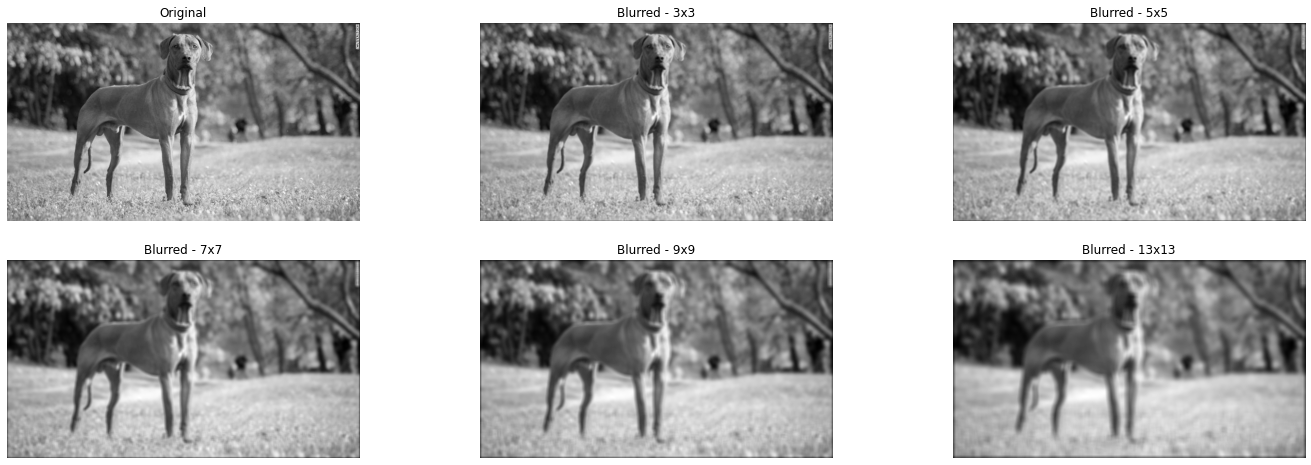

In [17]:
def gaussian_blur(img, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    padding = np.pad(img, (kernel_size // 2, kernel_size // 2), 'constant')

    result = np.zeros_like(img)

    for i in range(padding.shape[0] - kernel_size + 1):
        for j in range(padding.shape[1] - kernel_size + 1):
            result[i, j] = np.sum(padding[i:i + kernel_size, j:j + kernel_size] * kernel)
    return result


plot_image([
    ('Original', img_luminance),
    ('Blurred - 3x3', gaussian_blur(img_luminance, kernel_size=3)),
    ('Blurred - 5x5', gaussian_blur(img_luminance, kernel_size=5)),
    ('Blurred - 7x7', gaussian_blur(img_luminance, kernel_size=7)),
    ('Blurred - 9x9', gaussian_blur(img_luminance, kernel_size=9)),
    ('Blurred - 13x13', gaussian_blur(img_luminance, kernel_size=13)),
])

# Cannny Edge Detection
Canny edge detector is probably the most commonly used and most effective method.
we can use following steps to calculate Canny edge detector:
1. Gaussian Blur
2. Calculate Gradient
3. Non-Maximum Suppression
4. Double Threshold

1 and 2 are done by using gaussian blur and calculating gradient like sobel and prewitt.
3 is done by using non-maximum suppression to remove weak edges by checking if the gradient is greater than the gradient of the pixel on the other side of the edge.
4 is done by using double threshold to remove weak edges by checking if the gradient is greater than the high threshold and if the gradient is less than the low threshold.



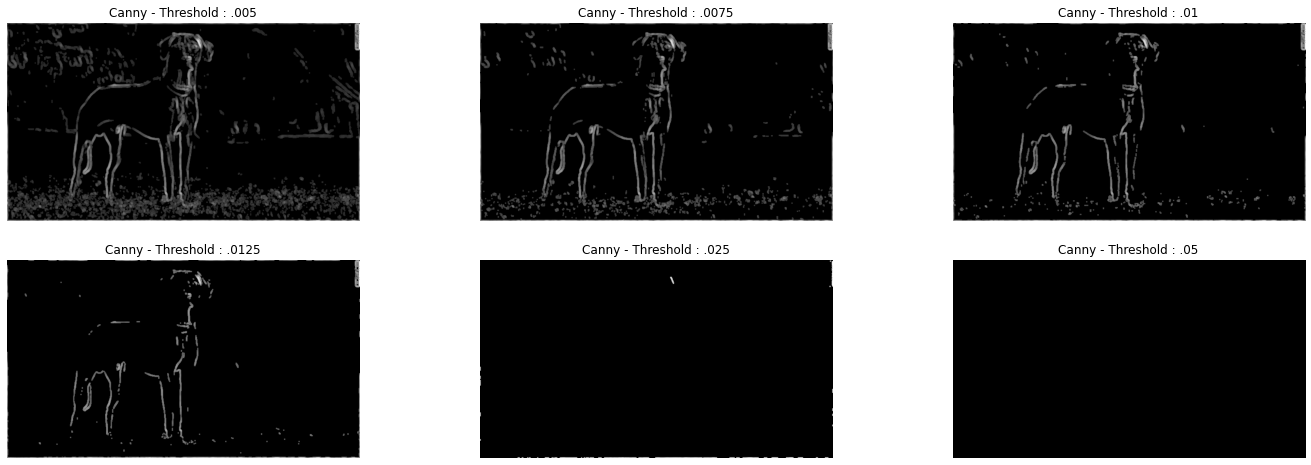

In [18]:
def non_maximum_suppression(img, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    padding = np.pad(img, (kernel_size // 2, kernel_size // 2), 'constant')

    result = np.zeros_like(img)

    for i in range(padding.shape[0] - kernel_size + 1):
        for j in range(padding.shape[1] - kernel_size + 1):
            result[i, j] = np.max(padding[i:i + kernel_size, j:j + kernel_size] * kernel)
    return result


def double_threshold(img, low_threshold=0.05, high_threshold=0.15):
    img = np.clip(img, 0., 1.)
    img[img < low_threshold] = 0.
    img[img > high_threshold] = 1.
    return img


def canny_edge(img, sigma=3, low_threshold=0.01, high_threshold=0.5):
    # Gaussian Blur
    img = gaussian_blur(img, kernel_size=sigma)

    # Calculate Gradient
    gradients, orientation = sobel_algorithm(img)

    # Non-Maximum Suppression
    suppressed = non_maximum_suppression(gradients)

    # Double Threshold
    return double_threshold(suppressed, low_threshold, high_threshold)


plot_image([
    ('Canny - Threshold : .005', canny_edge(img_luminance, low_threshold=.005)),
    ('Canny - Threshold : .0075', canny_edge(img_luminance, low_threshold=.0075)),
    ('Canny - Threshold : .01', canny_edge(img_luminance, low_threshold=.01)),
    ('Canny - Threshold : .0125', canny_edge(img_luminance, low_threshold=.0125)),
    ('Canny - Threshold : .025', canny_edge(img_luminance, low_threshold=.025)),
    ('Canny - Threshold : .05', canny_edge(img_luminance, low_threshold=.05)),
])

# Benchmarking
after looking through all the above methods, we can see that the Canny edge detector is the most efficient one. but how about the performance?
let`s perform simple benchmarking to compare the performance of all the methods.

In [19]:
time_sobel = time.time()
img_sobel_edge, _ = sobel_algorithm(img_luminance)
time_sobel = time.time() - time_sobel

time_sobel_roberts = time.time()
img_roberts_edge = robers_edge(img_luminance)
time_sobel_roberts = time.time() - time_sobel_roberts

time_prewitt = time.time()
img_prewitt_edge = prewitt_edge(img_luminance)
time_prewitt = time.time() - time_prewitt

time_lapacian = time.time()
img_laplacian_edge = laplacian_edge(img_luminance)
time_lapacian = time.time() - time_lapacian

time_canny = time.time()
img_canny_edge = canny_edge(img_luminance, low_threshold=.005)
time_canny = time.time() - time_canny

print(f"Sobel Algorithm : {time_sobel * 1000:.0f} ms")
print(f"Roberts Algorithm : {time_sobel_roberts * 1000:.0f} ms")
print(f"Prewitt Algorithm : {time_prewitt * 1000:.0f} ms")
print(f"Laplacian Algorithm : {time_lapacian * 1000:.0f} ms")
print(f"Canny Algorithm : {time_canny * 1000:.0f} ms")

Sobel Algorithm : 8 ms
Roberts Algorithm : 3860 ms
Prewitt Algorithm : 3901 ms
Laplacian Algorithm : 1952 ms
Canny Algorithm : 3750 ms


from the above benchmarking, sobel algorithm is the fastest one.
lets plot the benchmarking results.

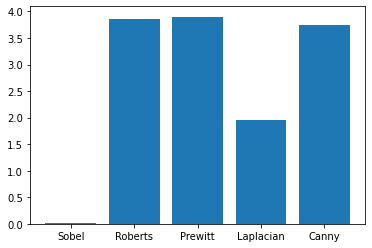

In [20]:
plt.bar(
    x=['Sobel', 'Roberts', 'Prewitt', 'Laplacian', 'Canny'],
    height=[time_sobel, time_sobel_roberts, time_prewitt, time_lapacian, time_canny],
    label='Time (ms) / Lower Better',
);

# Showdown

after placing the image side by side with the edge detection results we can see that all algorithms are very close to each other except for canny algorithm.
with result on more pronounced edges,

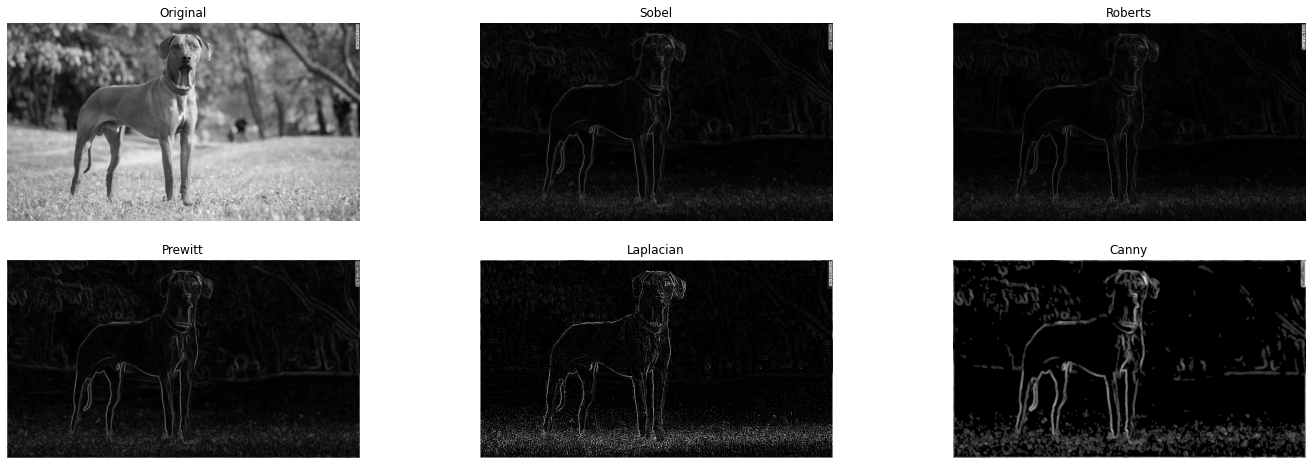

In [21]:
plot_image([
    ('Original', img_luminance),
    ('Sobel', img_sobel_edge),
    ('Roberts', img_roberts_edge),
    ('Prewitt', img_prewitt_edge),
    ('Laplacian', img_laplacian_edge),
    ('Canny', img_canny_edge),
])

# Thresholding

after getting the edge detection results, we can see that the edge detection results are not very clear.
we can solve this problem by using thresholding by clustering the edge detection results into 2 states.
1. if the signal was above the threshold, it will be set to 1.
2. if the signal was below the threshold, it will be set to 0.

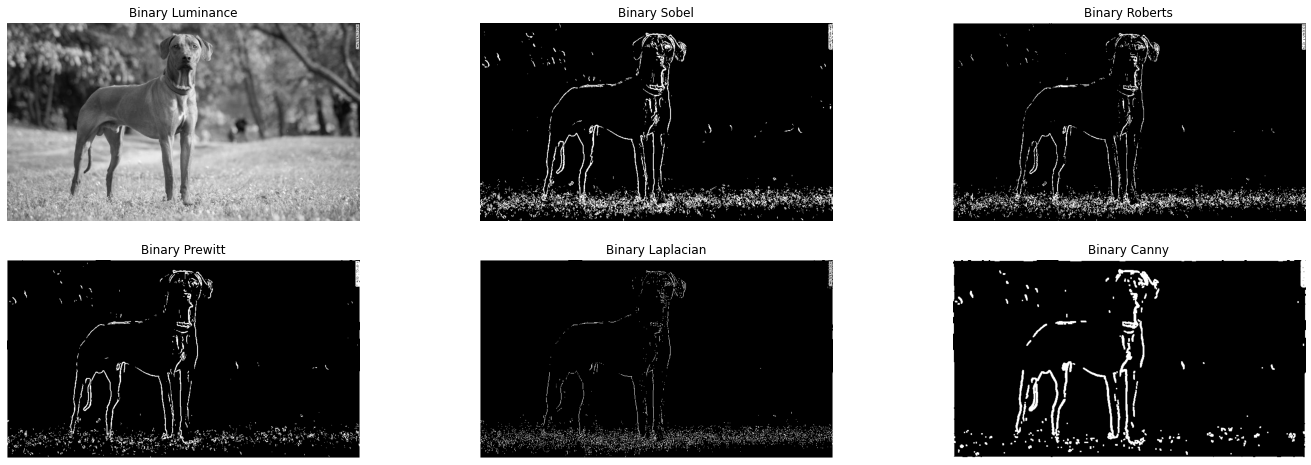

In [22]:
def binary_edge(img, threshold=None):
    _99_percentile = np.percentile(img, 99)
    _1_percentile = np.percentile(img, 1)
    if threshold is None:
        threshold = (_99_percentile + _1_percentile) / 2
    img = img > threshold
    return img


binary_sobel = binary_edge(img_sobel_edge)
binary_roberts = binary_edge(img_roberts_edge)
binary_prewitt = binary_edge(img_prewitt_edge)
binary_laplacian = binary_edge(img_laplacian_edge)
binary_canny = binary_edge(img_canny_edge)

plot_image([
    ('Binary Luminance', img_luminance),
    ('Binary Sobel', binary_sobel),
    ('Binary Roberts', binary_roberts),
    ('Binary Prewitt', binary_prewitt),
    ('Binary Laplacian', binary_laplacian),
    ('Binary Canny', binary_canny),
])

# Another Image
using the best algorithm for edge detection that I found.
we can see that the Canny algorithm is the best algorithm for edge detection.
with thresholding, we can eliminate the noise and the edges are more clear.

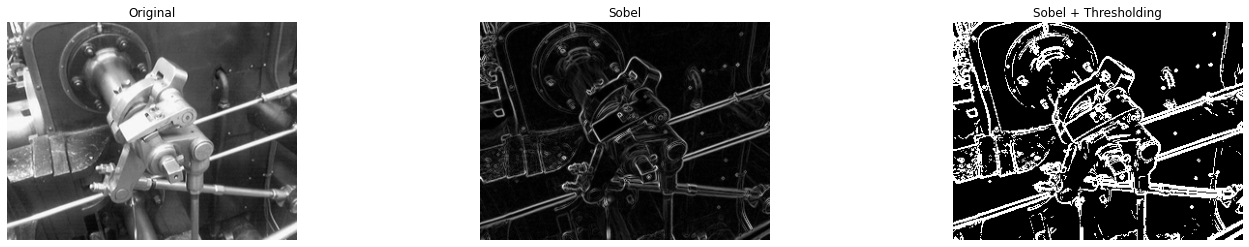

In [23]:
image_2 = Image.open('image_2.png')
img_2_luminance = np.array(image_2).mean(axis=-1) / 255.

image_2_edge, _ = sobel_algorithm(img_2_luminance)
image_2_edge /= np.max(image_2_edge)
image_2_edge_binary = binary_edge(image_2_edge, threshold=.125)

plot_image([
    ('Original', img_2_luminance),
    ('Sobel', image_2_edge),
    ('Sobel + Thresholding', image_2_edge_binary),
])

# Our Implementation vs Tensoflow Implementation

in this section, we will compare our implementation with the implementation of tensorflow.
from the visualisation the result are very similar this indicates our numpy implementation is correct.

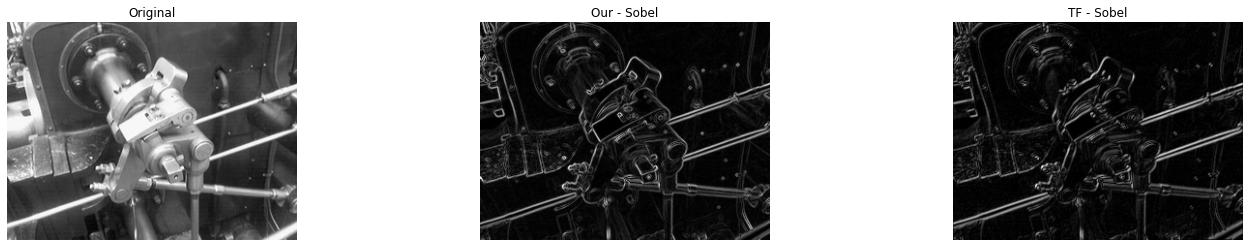

In [24]:
tf_sobel = tf.image.sobel_edges(tf.constant(img_2_luminance[None, :, :, None], dtype=tf.float32)).numpy()
tf_sobel = tf_sobel[0, :, :, 0]
tf_sobel_edge = tf_sobel.mean(axis=-1)
tf_sobel_edge = np.abs(tf_sobel_edge)
tf_sobel_edge /= np.max(tf_sobel_edge)

plot_image([
    ('Original', img_2_luminance),
    ('Our - Sobel', image_2_edge),
    ('TF - Sobel', tf_sobel_edge),
])

# Conclusions, Assumptions, Overall Analysis

## Conclusion
after trying all the edge detection algorithms, I found that the Canny algorithm is the best one. and more robust against noise, but it has a low performance. compared to other algorithms, it is not the best algorithm for real time edge detection. and all algorithms have the similar result.


## Assumptions
after trying with 2 image we can see that image input is crucial factor for edge detection accuracy. with better input contrast, the edge detection result will be more clear.
i think my benchmarking test was faulty here because the performance depends on API and implementation.
with Sobel algorithm, the performance is high because of the `Native Binging Numpy` implementation. and the other suffer from the python loop implementation.


## Overall Analysis
to conclude this assignment, the best algorithm for edge detection is Canny algorithm. and the best performance is the Sobel algorithm.
but that's still depends on the usage if you prefer to use in real time application or edges accuracy.